# Decision Tree Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.duplicated().sum()

1

In [7]:
df.shape

(150, 5)

### Separate x and y

In [8]:
x = df.drop(columns=['species'])
y = df[['species']]

In [9]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Preprocessing pipeline

In [11]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [12]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('num',StandardScaler())])

In [13]:
x_pre = num_pipe.fit_transform(x)
x_pre

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [14]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [15]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.3,random_state=10)

In [22]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
32,-0.779513,2.400185,-1.283389,-1.447076
52,1.280340,0.098217,0.649083,0.395774
70,0.068662,0.328414,0.592246,0.790671
121,-0.294842,-0.592373,0.649083,1.053935
144,1.038005,0.558611,1.103783,1.712096


In [23]:
xtrain.shape

(105, 4)

In [24]:
xtest.shape

(45, 4)

In [25]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
87,0.553333,-1.743357,0.364896,0.132510
111,0.674501,-0.822570,0.876433,0.922303
10,-0.537178,1.479398,-1.283389,-1.315444
91,0.310998,-0.131979,0.478571,0.264142
49,-1.021849,0.558611,-1.340227,-1.315444


In [26]:
ytrain.shape

(105, 1)

In [27]:
ytrain.head()

,species
32,setosa
52,versicolor
70,versicolor
121,virginica
144,virginica


In [28]:
ytest.head()

,species
87,versicolor
111,virginica
10,setosa
91,versicolor
49,setosa


### create a model

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1,min_samples_split=3,min_samples_leaf=3,criterion='entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=3)

In [31]:
model.score(xtrain,ytrain)

0.6857142857142857

In [32]:
model.score(xtest,ytest)

0.6222222222222222

### Hyperparametr Tuning

In [33]:
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
          'criterion':['gini','entropy']}

In [34]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gdtc = GridSearchCV(dtc,param_grid=params,cv=5,scoring='f1_macro')
gdtc.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [35]:
gdtc.best_score_

0.9294855797796974

In [36]:
gdtc.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [37]:
best_dtc = gdtc.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=2)

### Evaluate the model

In [38]:
best_dtc.score(xtrain,ytrain)

0.9523809523809523

In [39]:
best_dtc.score(xtest,ytest)

0.9777777777777777

### Create confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [41]:
ypred_tr = best_dtc.predict(xtrain)
ypred_ts = best_dtc.predict(xtest)

In [42]:
ypred_tr[0:5]

array(['setosa', 'versicolor', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [43]:
ypred_ts[0:5]

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa'],
      dtype=object)

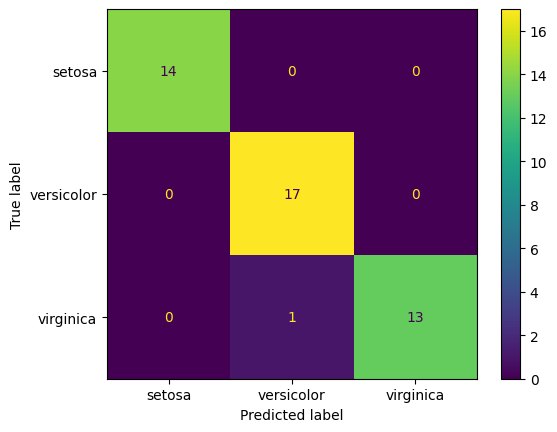

In [44]:
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_dtc.classes_)
cfd.plot()

### Print classification report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Ploting the decision Tree

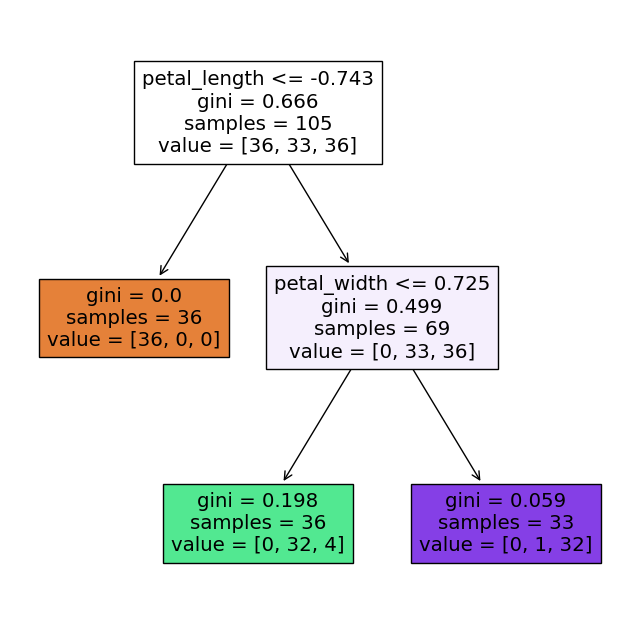

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plot_tree(best_dtc,feature_names=list(xtrain.columns),filled=True)
plt.show()

In [51]:
ytrain.value_counts()

species   
setosa        36
virginica     36
versicolor    33
Name: count, dtype: int64

### Predicting out of sample data

In [52]:
xnew = pd.read_csv('iris_sample.csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


### Transform the data

In [53]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182,  0.        , -0.08980313,  0.13250973],
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.        ],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571, -0.26238682],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [54]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


### Predictions

In [56]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [57]:
proba = best_dtc.predict_proba(xnew_pre)
proba

array([[0.        , 0.88888889, 0.11111111],
       [0.        , 0.03030303, 0.96969697],
       [0.        , 0.88888889, 0.11111111],
       [0.        , 0.88888889, 0.11111111],
       [0.        , 0.03030303, 0.96969697],
       [1.        , 0.        , 0.        ],
       [0.        , 0.88888889, 0.11111111],
       [0.        , 0.03030303, 0.96969697],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.88888889, 0.11111111],
       [0.        , 0.88888889, 0.11111111],
       [0.        , 0.03030303, 0.96969697],
       [0.        , 0.88888889, 0.11111111],
       [0.        , 0.88888889, 0.11111111]])

In [58]:
probability = []
for i in proba:
    probability.append(i.max())

In [59]:
probability

[0.8888888888888888,
 0.9696969696969697,
 0.8888888888888888,
 0.8888888888888888,
 0.9696969696969697,
 1.0,
 0.8888888888888888,
 0.9696969696969697,
 1.0,
 1.0,
 0.8888888888888888,
 0.8888888888888888,
 0.9696969696969697,
 0.8888888888888888,
 0.8888888888888888]

In [60]:
xnew['Prediction'] = preds
xnew['Probability'] = probability

In [61]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,Prediction,Probability
0,5.5,2.5,4.0,1.3,versicolor,0.888889
1,6.9,3.1,5.1,2.3,virginica,0.969697
2,5.1,2.5,3.0,1.1,versicolor,0.888889
3,4.4,2.9,NaN,0.2,versicolor,0.888889
4,5.9,3.0,5.1,1.8,virginica,0.969697
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,0.888889
7,6.5,3.0,5.2,2.0,virginica,0.969697
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


### Save the file

In [63]:
xnew.to_csv('Species Prediction1.csv',index=False)